# Group Comparisons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import numpy as np

# Import libraries for running ANOVA and post-hoc test
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Loading data

In [2]:
file = pd.ExcelFile("datasets/exercise_week5/chinese_food.xlsx")

In [3]:
file.sheet_names

['Greenhouse Gas Emission', 'Water Use', 'Land Use']

## Parsing dataframes

In [16]:
gas_df = file.parse("Greenhouse Gas Emission")
water_df = file.parse("Water Use")
land_df = file.parse("Land Use")

### Renaming columns

In [8]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   foodcode             2061 non-null   int64  
 1   Food item            2061 non-null   object 
 2   Food sub-group       2061 non-null   object 
 3   food_group           2061 non-null   object 
 4   co2_released         2061 non-null   float64
 5   Data source          2061 non-null   object 
 6   Language of journal  1040 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 112.8+ KB


In [19]:
gas_df.columns, water_df.columns, land_df.columns

(Index(['foodcode', 'food_item', 'food_subgroup', 'food_group', 'co2_released',
        'Data source', 'Language of journal'],
       dtype='object'),
 Index(['foodcode', 'food_item', 'food_subgroup', 'food_group', 'water_used',
        'Data source', 'Language of journal'],
       dtype='object'),
 Index(['foodcode', 'food_item', 'food_subgroup', 'food_group', 'land_used',
        'Data source', 'Language of journal'],
       dtype='object'))

In [18]:
#same column names
column_g0 = gas_df.columns[0] #food_code
column_g1 = gas_df.columns[1] #food_item
column_g2 = gas_df.columns[2] #food_subgroup
column_g3 = gas_df.columns[3] #food_group

#different names
column_g4 = gas_df.columns[4] #co2_released
column_w4 = water_df.columns[4] #water_used
column_l4 = land_df.columns[4] #land_used

#dictionaries with the old and new names
torename_gas = {column_g0:"foodcode", column_g1:"food_item", column_g2:"food_subgroup", column_g3:"food_group", column_g4:"co2_released"}
torename_water = {column_g0:"foodcode", column_g1:"food_item", column_g2:"food_subgroup", column_g3:"food_group", column_w4:"water_used"}
torename_land = {column_g0:"foodcode", column_g1:"food_item", column_g2:"food_subgroup", column_g3:"food_group", column_l4:"land_used"}

#renaming gas_df
gas_df = gas_df.rename(columns=torename_gas)
water_df = water_df.rename(columns=torename_water)
land_df = land_df.rename(columns=torename_land)

## Plotting distributions and boxplot on groups

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


### CO2

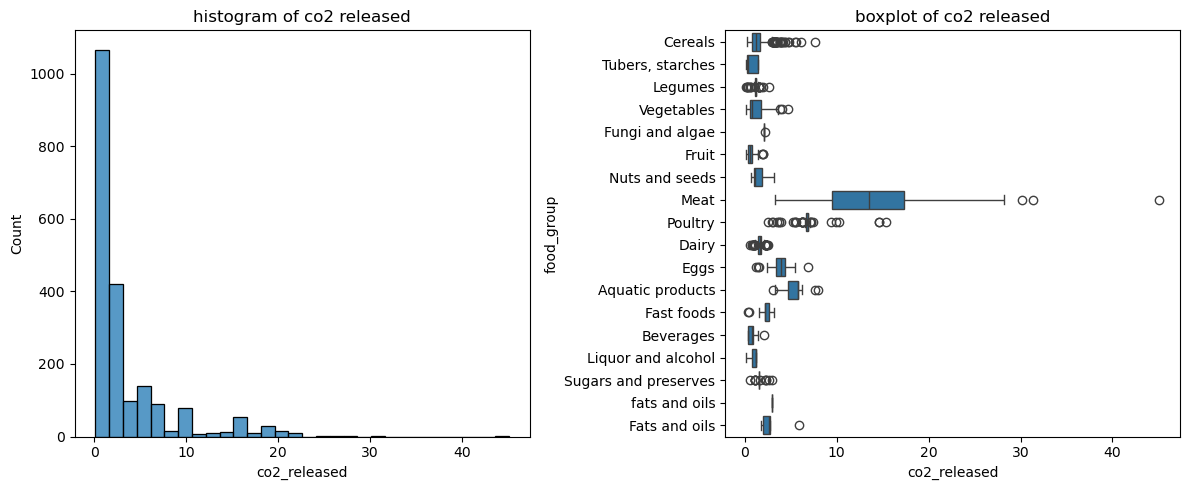

In [31]:
#checking normal distribution and boxplot of co2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(x="co2_released", data=gas_df, bins=30, ax=axes[0])
axes[0].set_title('histogram of co2 released')

sns.boxplot(y="food_group", x="co2_released", data=gas_df, ax=axes[1])
axes[1].set_title('boxplot of co2 released')

plt.tight_layout()
plt.show()

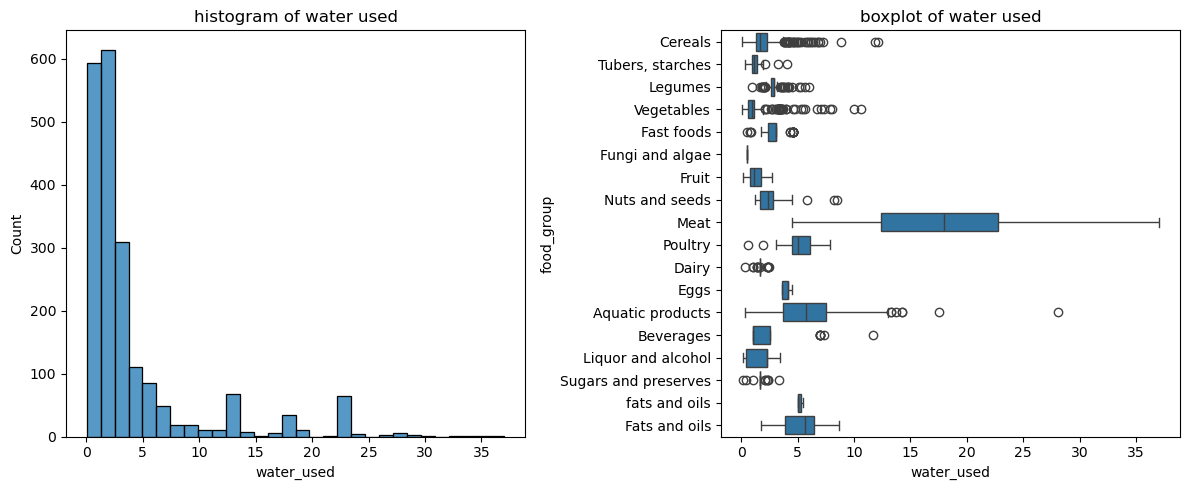

In [32]:
#checking normal distribution and boxplot of co2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(x="water_used", data=water_df, bins=30, ax=axes[0])
axes[0].set_title('histogram of water used')

sns.boxplot(y="food_group", x="water_used", data=water_df, ax=axes[1])
axes[1].set_title('boxplot of water used')

plt.tight_layout()
plt.show()

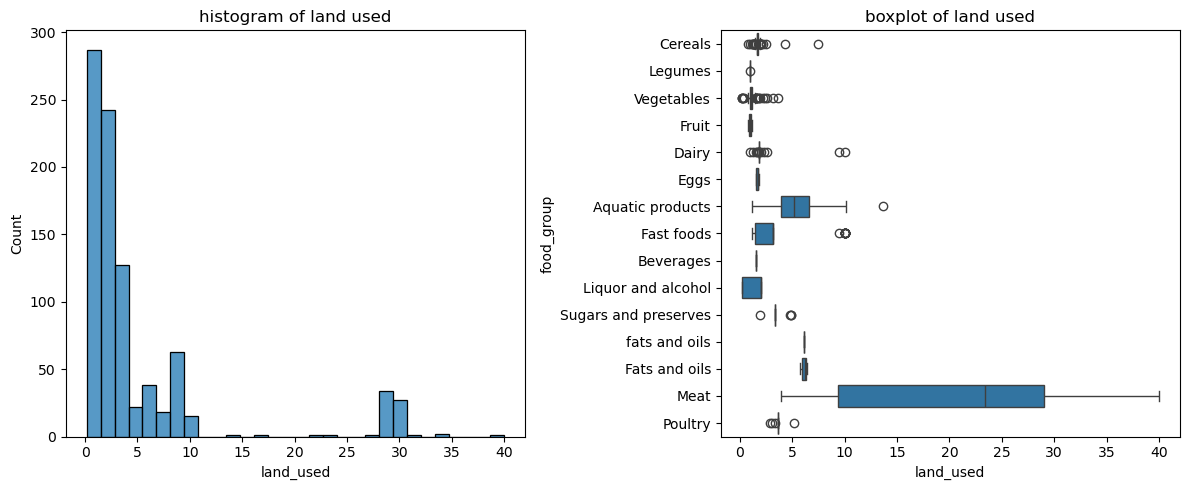

In [34]:
#checking normal distribution and boxplot of co2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(x="land_used", data=land_df, bins=30, ax=axes[0])
axes[0].set_title('histogram of land used')

sns.boxplot(y="food_group", x="land_used", data=land_df, ax=axes[1])
axes[1].set_title('boxplot of land used')

plt.tight_layout()
plt.show()

## Anova - Comparing CO2 released amounts among food groups

### Hypotheses

- Null hypothesis: Mean CO2 released is not significantly different between different food groups.
- Alternative hypothesis: At least one of the means is significantly different from the others.

### Assumptions
- Independent samples
- Equal sample sizes of groups
- Equal variances of groups
- Normal distribution of the dependent variable
- Normal distribution of residuals

### Creating a new column with logarithm

In [44]:
gas_df["log_co2"] = np.log(gas_df["co2_released"]+1)
gas_df["sqr_co2"] = np.sqrt(gas_df["co2_released"]) # if you want to try out another transformation

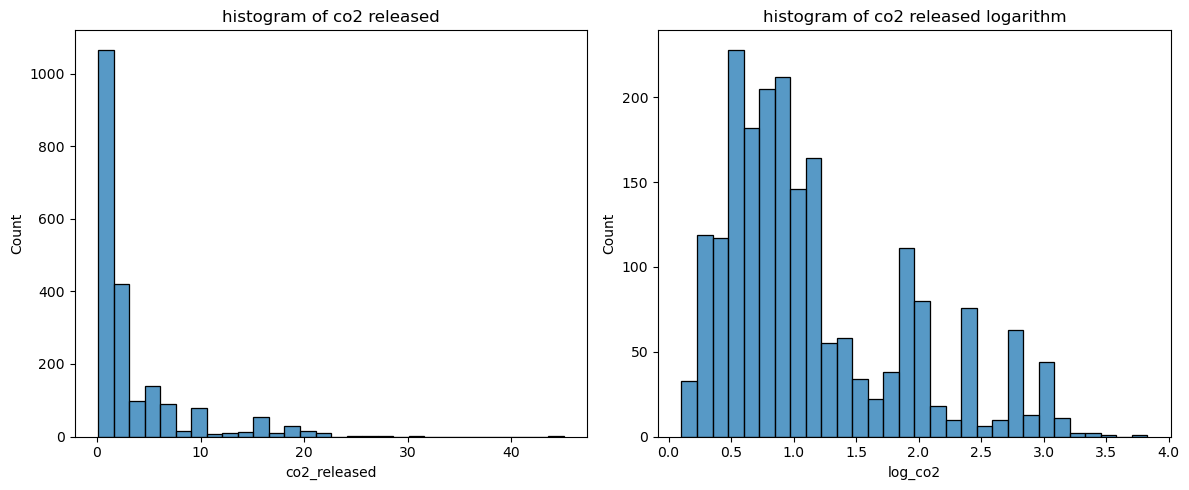

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(x="co2_released", data=gas_df, bins=30, ax=axes[0])
axes[0].set_title('histogram of co2 released')

sns.histplot(x="sqr_co2", data=gas_df, bins=30, ax=axes[1])
axes[1].set_title('histogram of co2 released logarithm')

plt.tight_layout()
plt.show()

#Compare the changes

### Running the Anova (one way)

In [51]:
formula = "log_co2 ~ C(food_group)" #it is recommended to put the formula in a variable called "formula"
model = ols(formula, data=gas_df).fit() #because the anova is also a linear model, you have to use the ols function and add the .fit()

In [53]:
aov_table = anova_lm(model, typ=2) #use tpy=2 for no interactions
aov_table

,sum_sq,df,F,PR(>F)
C(food_group),951.176409,17.0,689.614602,0.0
Residual,165.757836,2043.0,NaN,NaN


### Inspecting residuals

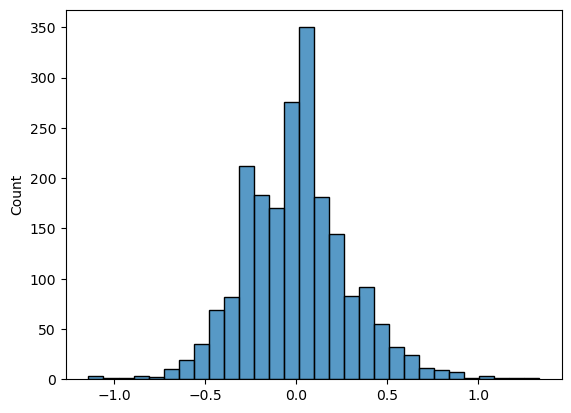

In [57]:
residuals = model.resid  #getting the residuals of the anova model
sns.histplot(residuals, bins=30) #plotting the histogram of the residuals
plt.show()

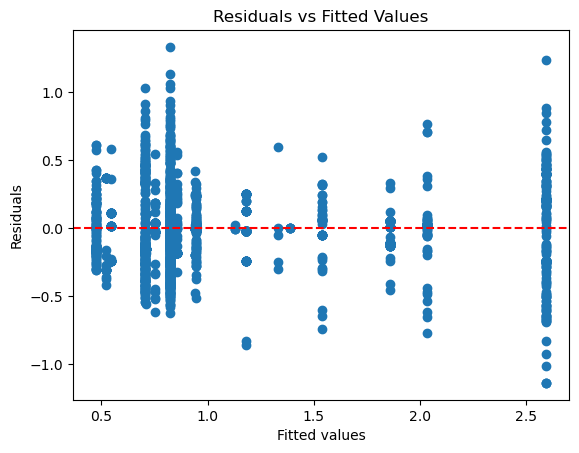

In [59]:
# Scatter plot of residuals
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [60]:
# Extracting the sum of squares values for the model and residuals
SS_model = aov_table['sum_sq'].iloc[:-1].sum()
SS_residual = aov_table['sum_sq'].iloc[-1]
# Total sum of squares
SS_total = SS_model + SS_residual
      
# Explained variance
explained_variance = SS_model / SS_total
print(f'Explained Variance: {explained_variance:.3f}')

Explained Variance: 0.852


### Tukey PostHoc Test

In [62]:
tukey = pairwise_tukeyhsd(endog=gas_df['log_co2'], groups=gas_df['food_group'], alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
    Aquatic products            Beverages   -1.313    0.0 -1.4783 -1.1476   True
    Aquatic products              Cereals  -1.0317    0.0   -1.13 -0.9334   True
    Aquatic products                Dairy  -0.9127    0.0 -1.0419 -0.7836   True
    Aquatic products                 Eggs  -0.3192    0.0 -0.4921 -0.1462   True
    Aquatic products           Fast foods  -0.6762    0.0 -0.8047 -0.5476   True
    Aquatic products        Fats and oils  -0.5263 0.0067 -0.9801 -0.0725   True
    Aquatic products                Fruit  -1.3842    0.0 -1.5098 -1.2586   True
    Aquatic products      Fungi and algae   -0.726 0.0001 -1.2314 -0.2206   True
    Aquatic products              Legumes  -1.1045    0.0 -1.2469  -0.962   True
    Aquatic products   Liquo

## Grouping by food_items

If you check the dataframe carefully, there are no duplicated rows but there foodcode/food_item is duplicated several times for some food groups. Because you can't remove the duplicated food times arbitrarily, you have to merge them by calculating their mean. 

In [63]:
#creating a new dataframe with the grouped items
df = pd.DataFrame(gas_df.groupby(by=["food_group","food_subgroup", "food_item"])["co2_released"].mean()).reset_index(drop=False)

In [65]:
#compare the value counts of food groups between gas_df and df
gas_df["food_group"].value_counts(), df["food_group"].value_counts()

(food_group
 Cereals                 570
 Vegetables              315
 Meat                    274
 Fruit                   126
 Aquatic products        125
 Fast foods              115
 Dairy                   113
 Poultry                  86
 Legumes                  80
 Beverages                51
 Liquor and alcohol       50
 Eggs                     45
 Nuts and seeds           42
 Tubers, starches         29
 Sugars and preserves     25
 fats and oils             6
 Fats and oils             5
 Fungi and algae           4
 Name: count, dtype: int64,
 food_group
 Vegetables              186
 Meat                    126
 Aquatic products        112
 Fast foods              110
 Cereals                  92
 Fruit                    70
 Legumes                  66
 Beverages                50
 Dairy                    47
 Liquor and alcohol       46
 Poultry                  42
 Nuts and seeds           39
 Tubers, starches         25
 Eggs                     23
 Sugars and preserve

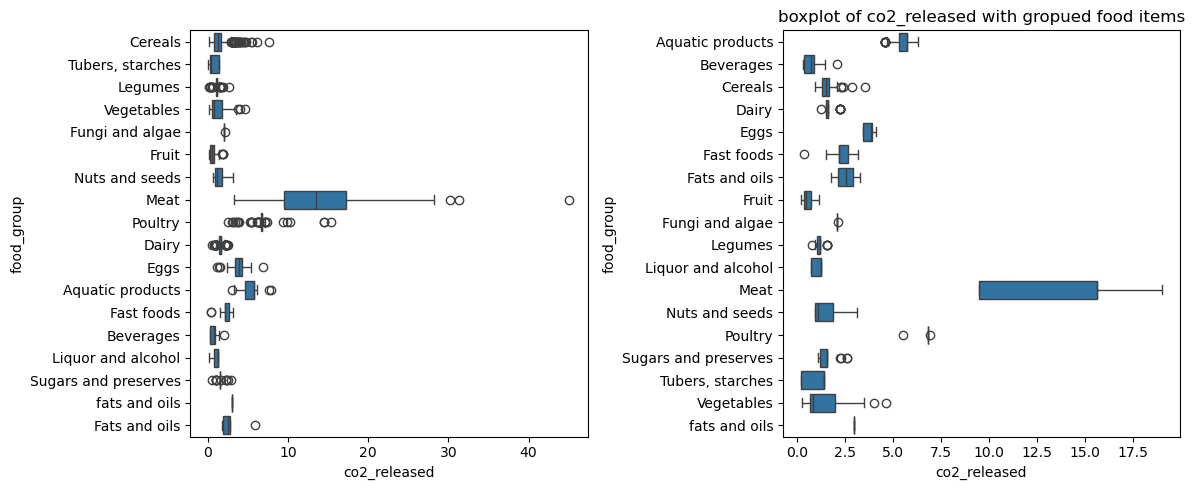

In [74]:
# comparing boxplots between gas_df and df
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.boxplot(y="food_group", x="co2_released", data=gas_df, ax=axes[0])
axes[1].set_title('boxplot of co2_released with duplicated food items')


sns.boxplot(y="food_group", x="co2_released", data=df, ax=axes[1])
axes[1].set_title('boxplot of co2_released with gropued food items')

plt.tight_layout()
plt.show()

#can you notice the difference?

### Cleaning up a bit

Because we not that meat overall release more CO2 in its production than non meat food, let's exclude the following groups: Poultry, Meat and Aquatic products

In [71]:
cleaned_df = df.loc[~df["food_group"].isin(["Poultry", "Meat", "Aquatic products"]),].reset_index(drop=True)

Fats and oils are in two separate groups

In [73]:
cleaned_df.loc[cleaned_df["food_group"]=="fats and oils","food_group"] = "Fats and oils"

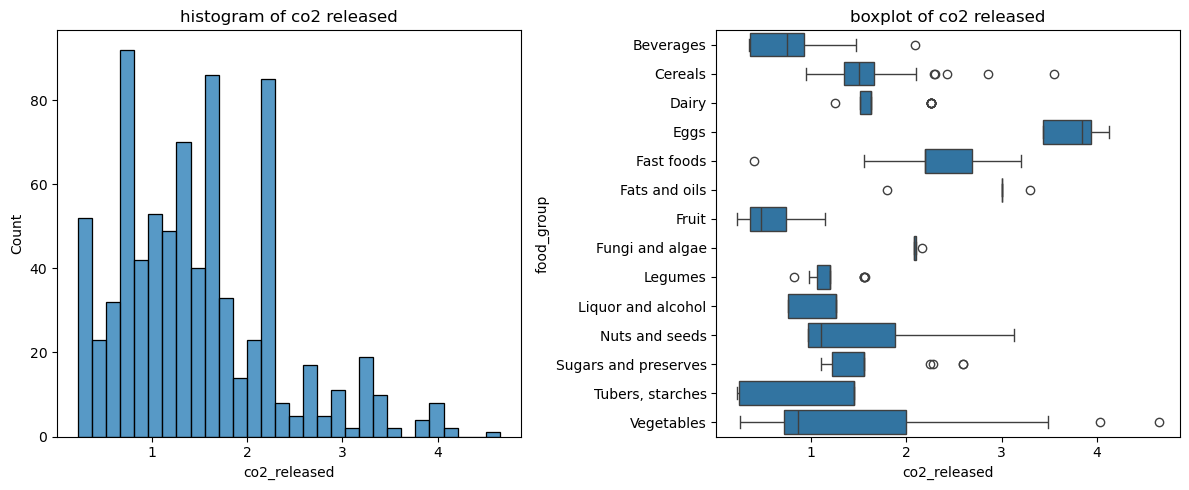

In [77]:
#let's see the repective histogram and boxplot

#checking normal distribution and boxplot of co2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(x="co2_released", data=cleaned_df, bins=30, ax=axes[0])
axes[0].set_title('histogram of co2 released')

sns.boxplot(y="food_group", x="co2_released", data=cleaned_df, ax=axes[1])
axes[1].set_title('boxplot of co2 released')

plt.tight_layout()
plt.show()

In [ ]:
sns.histplot(np.log(df["co2_released"]+1))

What happens if we transform the co2_released column

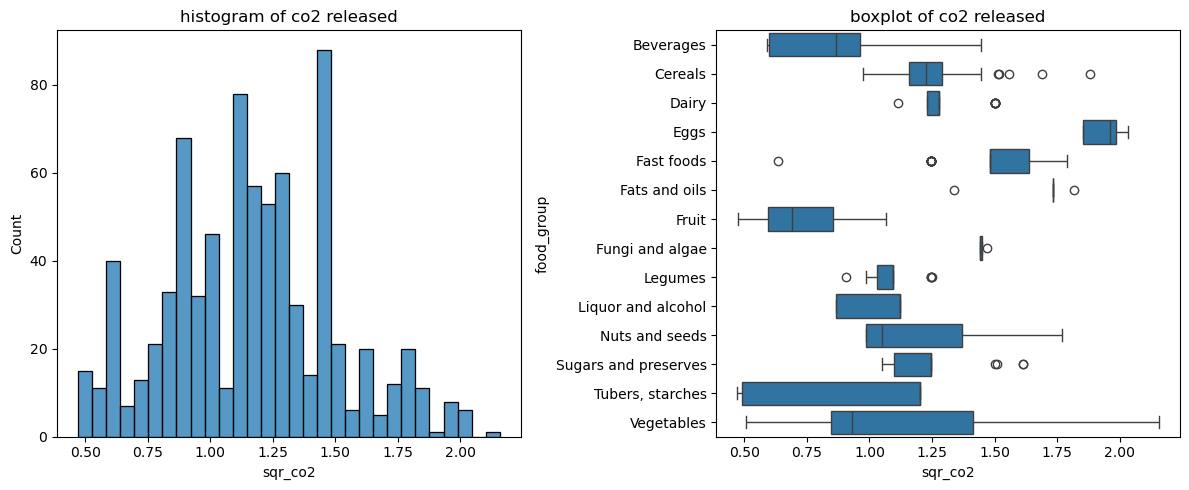

In [83]:
cleaned_df["sqr_co2"] = np.sqrt(cleaned_df["co2_released"]) #square root transformation is less aggresive than logaritmic transformation.

#checking normal distribution and boxplot of co2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(x="sqr_co2", data=cleaned_df, bins=30, ax=axes[0])
axes[0].set_title('histogram of co2 released')

sns.boxplot(y="food_group", x="sqr_co2", data=cleaned_df, ax=axes[1])
axes[1].set_title('boxplot of co2 released')

plt.tight_layout()
plt.show()
#much better right?

### Anova again

In [86]:
formula = 'sqr_co2 ~ C(food_group)' 
model2 = ols(formula, data=cleaned_df).fit()

aov_table2 = anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
C(food_group),53.011634,13.0,83.933435,4.952912e-138
Residual,37.603979,774.0,NaN,NaN


This Anova looks more realistic despite the fact of still having unequal variances and unbalanced group sizes

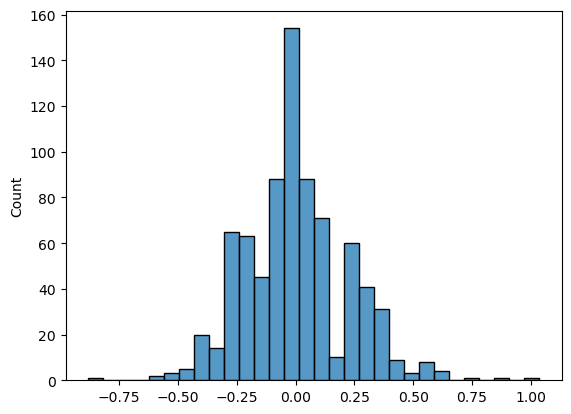

In [88]:
residuals2 = model2.resid
sns.histplot(residuals2, bins=30)
plt.show()

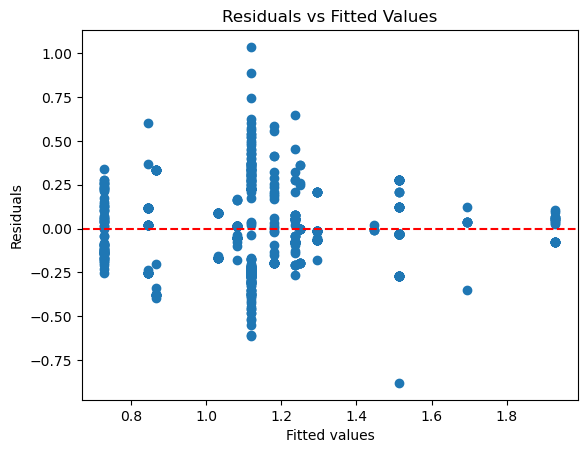

In [90]:
# Scatter plot of residuals
plt.scatter(model2.fittedvalues, model2.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

#still not full spread

In [92]:
# Extract the sum of squares values for the model and residuals
SS_model = aov_table2['sum_sq'].iloc[:-1].sum()
SS_residual = aov_table2['sum_sq'].iloc[-1]
# Total sum of squares
SS_total = SS_model + SS_residual
      
# Explained variance
explained_variance = SS_model / SS_total
print(f'Explained Variance: {explained_variance:.3f}')

Explained Variance: 0.585


In [96]:
tukey = pairwise_tukeyhsd(endog=cleaned_df['sqr_co2'], groups=cleaned_df['food_group'], alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
           Beverages              Cereals   0.3908    0.0  0.2605  0.5211   True
           Beverages                Dairy   0.4484    0.0  0.2977   0.599   True
           Beverages                 Eggs   1.0835    0.0  0.8966  1.2703   True
           Beverages           Fast foods   0.6686    0.0  0.5421  0.7951   True
           Beverages        Fats and oils   0.8477    0.0  0.5653  1.1301   True
           Beverages                Fruit  -0.1161 0.2043 -0.2534  0.0212  False
           Beverages      Fungi and algae   0.6022    0.0  0.2169  0.9875   True
           Beverages              Legumes    0.237    0.0   0.098  0.3761   True
           Beverages   Liquor and alcohol   0.1872 0.0028  0.0357  0.3387   True
           Beverages       N

## Alternative Anovas

We ran an Anova but violating the assumptions. However, the are other Anovas that work better for these conditions

### Test for equal variances

In [98]:
from scipy.stats import levene

# Create a list of arrays: one for each group
groups = [group['sqr_co2'].values for name, group in cleaned_df.groupby('food_group')]

# Run Levene's test
stat, p = levene(*groups)
print(f"Levene’s test: W={stat:.3f}, p={p:.3f}")

Levene’s test: W=20.955, p=0.000


### Welch's Anova
https://pingouin-stats.org/build/html/generated/pingouin.welch_anova.html

In [100]:
import pingouin as pg

# Welch’s ANOVA
welch_results = pg.welch_anova(dv='sqr_co2', between='food_group', data=cleaned_df)
print(welch_results)

       Source  ddof1       ddof2           F         p-unc       np2
0  food_group     13  112.933856  349.837152  1.049143e-84  0.585017


So yes, based on this anova output we can say that the different co2 released varies according to the food group variable, which accounts for 58.5% of the total variation

### Games-Howell post hoc test
https://pingouin-stats.org/build/html/generated/pingouin.pairwise_gameshowell.html

In [102]:
# Run Games–Howell post-hoc test
gh_results = pg.pairwise_gameshowell(dv='sqr_co2', between='food_group', data=cleaned_df)
gh_results

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Beverages,Cereals,0.845819,1.236599,-0.390781,0.029373,-13.303928,76.650791,0.000000e+00,-2.563118
1,Beverages,Dairy,0.845819,1.294198,-0.448379,0.029826,-15.033179,76.686260,8.548717e-15,-2.979149
2,Beverages,Eggs,0.845819,1.929284,-1.083465,0.029921,-36.211039,69.622080,2.997602e-14,-6.794489
3,Beverages,Fast foods,0.845819,1.514412,-0.668593,0.031217,-21.417307,93.606018,4.218847e-15,-3.655759
4,Beverages,Fats and oils,0.845819,1.693506,-0.847687,0.057778,-14.671583,10.906531,7.931716e-07,-4.657438
...,...,...,...,...,...,...,...,...,...,...
86,Nuts and seeds,"Tubers, starches",1.180972,0.867829,0.313143,0.081011,3.865432,38.077130,2.405893e-02,1.062984
87,Nuts and seeds,Vegetables,1.180972,1.120690,0.060282,0.045987,1.310857,74.004723,9.880932e-01,0.184083
88,Sugars and preserves,"Tubers, starches",1.249829,0.867829,0.382001,0.080245,4.760426,35.697219,2.185975e-03,1.314288
89,Sugars and preserves,Vegetables,1.249829,1.120690,0.129140,0.044623,2.893995,43.643175,2.191326e-01,0.392146
